In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
df1 = pd.read_csv('cleaned_enrolled_data.csv')
df2 = pd.read_csv('cleaned_biometric_data.csv')
df3 = pd.read_csv('cleaned_demo_data.csv')

In [6]:
df2.drop(columns=['minor', 'adult'],axis = 1, inplace = True)

In [7]:
df3.drop(columns=['minor', 'adult'],axis = 1, inplace = True)

In [8]:
df1.drop(columns=['new_born','minor', 'adult'],axis = 1, inplace = True)

In [9]:
df1.head(1)

,date,state,total
0,02-03-2025,Meghalaya,109


In [21]:
state_df1 = df1.groupby(['state'],as_index=False).agg({'total': 'sum'})


In [22]:
state_df2  = df2.groupby(['state'],as_index=False).agg({'total': 'sum'})


In [23]:
state_df3  = df3.groupby(['state'],as_index=False).agg({'total': 'sum'})


In [25]:
state_df1.shape

(36, 2)

In [26]:
state_df2.shape

(36, 2)

In [29]:
state_df3.shape

(36, 2)

In [34]:
state = state_df1.merge(state_df2, on='state').merge(state_df3, on='state')


In [36]:
state.columns = ['state', 'total_enrol', 'total_bio', 'total_demo']


In [37]:
state

,state,total_enrol,total_bio,total_demo
0,Andaman and Nicobar Islands,501,19994,5228
1,Andhra Pradesh,124273,3610776,1642143
2,Arunachal Pradesh,4240,70059,28391
3,Assam,225359,945150,755097
4,Bihar,593753,4778968,3638845
5,Chandigarh,2620,73552,57395
6,Chhattisgarh,99773,2559111,1421369
7,Dadra and Nagar Haveli and Daman and Diu,1782,38892,9203
8,Delhi,92838,1281944,969666
9,Goa,2280,66554,27691


In [38]:
correlation_matrix = state.corr(numeric_only=True)
print(correlation_matrix)

             total_enrol  total_bio  total_demo
total_enrol     1.000000   0.870296    0.951723
total_bio       0.870296   1.000000    0.929951
total_demo      0.951723   0.929951    1.000000


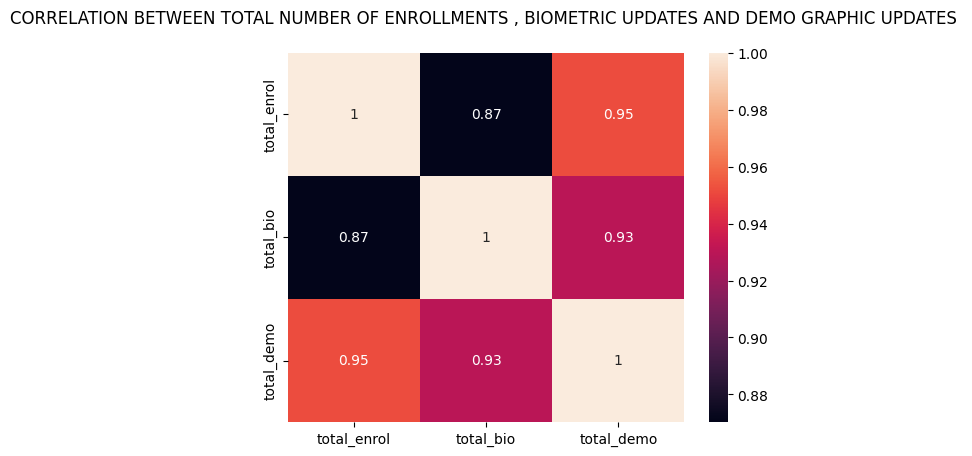

In [49]:
import seaborn as sns

sns.heatmap(state.corr(numeric_only=True), annot=True)
plt.title('CORRELATION BETWEEN TOTAL NUMBER OF ENROLLMENTS , BIOMETRIC UPDATES AND DEMO GRAPHIC UPDATES \n')
plt.show()
